**Decision Tree & Random Forest**

---



---
1. Data Cleaning
2. Data Processing
3. Checking best Parameter for Decision Tree
4. Applying Decision Tree Model
5. Evaluationg the Model
6. Check whethere Overfit or not
7. Applying Random Forest Classifier.
8. Evauationg Model (CV)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Heart Disease.csv')

In [ ]:
df1 = df.copy()

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


**1. Data Cleaning**

---



In [ ]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [ ]:
df = df[~(df['BMI']>42)] # Droping outliers

In [ ]:
df.shape

(308648, 18)

In [ ]:
df.drop_duplicates() # Droping Duplicates

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,No,22.22,No,No,No,0,0,No,Female,18-24,Hispanic,No,Yes,Excellent,8,No,No,No
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No


In [ ]:
# Filtering minimum age from Age Category Column]

df['AgeCategory'] = df['AgeCategory'].replace(('80 or older'), ('80-0'))
df['AgeCategory']=df['AgeCategory'].str.replace(pat=r'-',repl=' ', regex=False)
df['AgeCategory']=df['AgeCategory'].str.split()
df['Min AgeCategory'] = df['AgeCategory'].apply(lambda x: x[0])
df['AgeCategory'] = df['Min AgeCategory'].astype('int')

In [ ]:
df['AgeCategory']

0         55
1         80
2         65
3         75
4         40
          ..
319789    18
319790    60
319791    35
319792    45
319793    25
Name: AgeCategory, Length: 308648, dtype: int64

In [ ]:
df = df.drop(['Min AgeCategory'], axis = 1)

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40,White,No,Yes,Very good,8,No,No,No


**2. Data Processing**

---



In [ ]:
# Encoding using Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,55,5,2,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,80,5,0,1,4,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,65,5,2,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,75,5,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,40,5,0,1,4,8,0,0,0


In [ ]:
# separating test, target attribute
x = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']

In [ ]:
# Under Sampling Using Near Miss
from imblearn.under_sampling import NearMiss
nrms = NearMiss()

In [ ]:
X, Y = nrms.fit_resample(x, y) # resampling Data

In [ ]:
Y.value_counts() # Data resampled

0    26102
1    26102
Name: HeartDisease, dtype: int64

In [ ]:
# Separating Training and testing data set

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, train_size=.70, random_state=42)

In [ ]:
xtest.shape

(15662, 17)

**3. Checking best parameter** 

---



In [ ]:

from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier() # creating model object
# model.fit(xtrain, ytrain)

In [ ]:
pruning_path = model.cost_complexity_pruning_path(xtrain, ytrain) # storing cost complexity
ccp_alpha_values, impurity_values = pruning_path.ccp_alphas, pruning_path.impurities # storing ccp alpha and imurity values

In [ ]:
ccp_alpha_values

array([0.        , 0.        , 0.        , ..., 0.0374749 , 0.04378193,
       0.14816915])

In [ ]:
impurity_values

array([0.01962964, 0.01962964, 0.01962964, ..., 0.30804719, 0.35182912,
       0.49999827])

In [ ]:
ccp_alpha_values.shape

(2340,)

In [ ]:
clfs_list = []  # save diffrent classifiers

for x in ccp_alpha_values:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=x)
    clf.fit(xtrain, ytrain)
    clfs_list.append(clf)

In [ ]:
clfs_list

[DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(ccp_alpha=5.212527789288961e-07, random_state=42),
 DecisionTreeClassifier(ccp_alpha=9.1219236

In [ ]:
# Checking train and testing scores of ccp alpha values

train_scores = [clf.score(xtrain, ytrain) for clf in clfs_list]
test_scores = [clf.score(xtest, ytest) for clf in clfs_list]

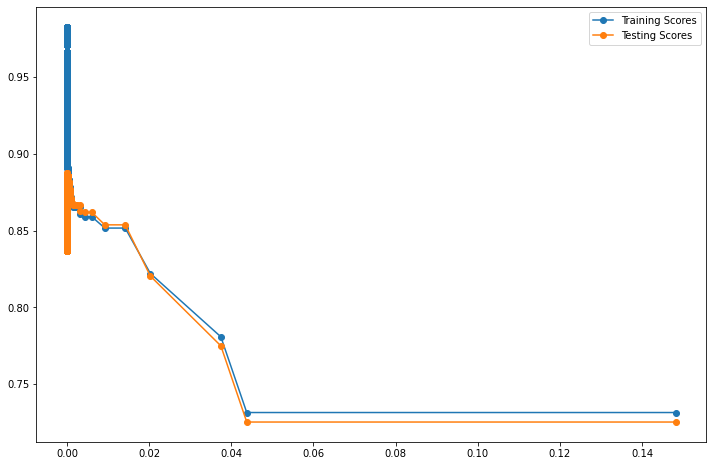

In [ ]:
# Plotting scores of training and testing data
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8)) # define the size of plot

plt.plot(ccp_alpha_values, train_scores, '-o', label='Training Scores')
plt.plot(ccp_alpha_values, test_scores, '-o', label='Testing Scores')

plt.legend()

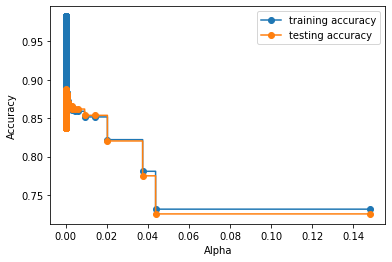

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")

ax.plot(ccp_alpha_values, train_scores, marker='o', label="training accuracy", drawstyle="steps-post")
ax.plot(ccp_alpha_values, test_scores, marker='o', label="testing accuracy", drawstyle="steps-post")
ax.legend()

In [ ]:
# Setting decision tree parameter
import numpy as np
max_features = ['sqrt', 'log2']
max_depth = np.random.randint(10,30,50)
criterion = ['gini', 'entropy']
min_samples_split = [20,30,40]
ccp_alpha = [0.00,0.001,0.00001 ]

grids = {
  
    'max_features': max_features,
    'max_depth': max_depth,
    'criterion': criterion,
    'min_samples_split': min_samples_split,
    'ccp_alpha': ccp_alpha
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gc = GridSearchCV(model, grids,cv=5) # defining grid search object

In [ ]:
gc.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.001, 1e-05],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([28, 14, 26, 11, 15, 22, 22, 28, 19, 29, 18, 11, 18, 12, 11, 18, 20,
       10, 27, 11, 15, 14, 26, 18, 18, 15, 18, 18, 29, 25, 26, 14, 28, 13,
       22, 11, 15, 12, 28, 19, 25, 25, 19, 28, 10, 17, 10, 19, 15, 14]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [20, 30, 40]})

In [ ]:
gc.best_estimator_ # best paramter

DecisionTreeClassifier(ccp_alpha=1e-05, max_depth=19, max_features='sqrt',
                       min_samples_split=30)

5. Applying Decision Tree Model

---



In [ ]:
# Defining model with best parameter
model2=DecisionTreeClassifier(ccp_alpha=1e-05, max_depth=19, max_features='sqrt',
                       min_samples_split=30)

In [ ]:
model2.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=1e-05, max_depth=19, max_features='sqrt',
                       min_samples_split=30)

In [ ]:
model2.score(xtest, ytest) # testing score

0.8815604648193078

In [ ]:
pred = model2.predict(xtest) # storing predicting result

Evaluating Model

In [ ]:
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix, RocCurveDisplay

In [ ]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7797
           1       0.94      0.81      0.87      7865

    accuracy                           0.88     15662
   macro avg       0.89      0.88      0.88     15662
weighted avg       0.89      0.88      0.88     15662



In [ ]:
test_confusion_matrix = confusion_matrix(ytest,pred)

In [ ]:
tp, fn, fp, tn = confusion_matrix(ytest,pred).reshape(-1)

In [ ]:
tp

7403

In [ ]:
fn

394

In [ ]:
fp

1468

In [ ]:
test_confusion_matrix

array([[7403,  394],
       [1468, 6397]])

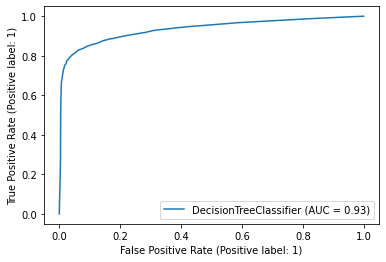

In [ ]:
import matplotlib.pyplot as plt
RocCurveDisplay.from_estimator(model2, xtest, ytest)
plt.show()

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
kfold = KFold(n_splits=10, shuffle=True)

In [ ]:
result = cross_val_score(model2, X, Y, cv=kfold)

In [ ]:
result

array([0.87684352, 0.88201494, 0.87377897, 0.88373875, 0.88908046,
       0.88314176, 0.8954023 , 0.8802682 , 0.88295019, 0.88467433])

In [ ]:
result.mean()

0.8831893414526217

**Random forest Classifier**

---



---



In [ ]:
from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier()

In [ ]:
cls.fit(xtrain, ytrain)

RandomForestClassifier()

In [ ]:
cls.score(xtest, ytest)

0.848039841654961

In [ ]:
import numpy as np
trees = np.random.randint(15,150,30)

In [ ]:
trees

array([143,  68, 124,  77, 140, 108,  79, 145,  22,  95,  49,  32,  21,
        44, 148, 142,  62,  80,  30,  67, 125,  34, 121, 149,  58,  87,
        66, 143, 117,  17])

In [ ]:
max_features = ['sqrt', 'log2']
max_depth = np.random.randint(10,30,50)
criterion = ['gini', 'entropy']
min_samples_split = [20,30,40]

grids2 = {
    'n_estimators': trees,
    'max_features': max_features,
    'max_depth': max_depth,
    'criterion': criterion,
    'min_samples_split': min_samples_split
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rcv = RandomizedSearchCV(cls, grids2, n_iter=50, cv=5)

In [ ]:
rcv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([23, 19, 23, 21, 11, 14, 26, 25, 14, 14, 27, 27, 10, 26, 28, 14, 29,
       25, 25, 29, 21, 25, 14, 16, 26, 23, 21, 27, 20, 27, 27, 14, 26, 23,
       21, 19, 23, 14, 28, 21, 12, 29, 18, 25, 11, 27, 26, 12, 18, 16]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [20, 30, 40],
                                        'n_estimators': array([143,  68, 124,  77, 140, 108,  79, 145,  22,  95,  49,  32,  21,
        44, 148, 142,  62,  80,  30,  67, 125,  34, 121, 149,  58,  87,
        66, 143, 117,  17])})

In [ ]:
rcv.best_params_

{'n_estimators': 149,
 'min_samples_split': 40,
 'max_features': 'log2',
 'max_depth': 21,
 'criterion': 'gini'}

In [ ]:
clf2 = rcv.best_estimator_

In [ ]:
clf2 = RandomForestClassifier(max_depth=21, max_features='log2', min_samples_split=40,
                       n_estimators=149)

In [ ]:
clf2.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=21, max_features='log2', min_samples_split=40,
                       n_estimators=149)

In [ ]:
clf2.score(xtest, ytest)

0.8922232154258716

In [ ]:
pred2 = clf2.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix, RocCurveDisplay

In [ ]:
print(classification_report(ytest,pred2))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      7797
           1       0.94      0.84      0.89      7865

    accuracy                           0.89     15662
   macro avg       0.90      0.89      0.89     15662
weighted avg       0.90      0.89      0.89     15662



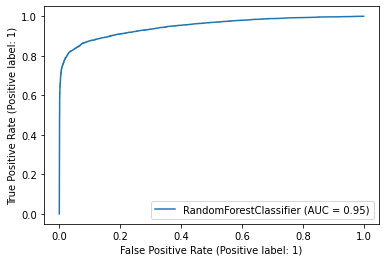

In [ ]:
import matplotlib.pyplot as plt
RocCurveDisplay.from_estimator(clf2, xtest, ytest)
plt.show()

In [ ]:
test_confusion_matrix = confusion_matrix(ytest,pred2)

In [ ]:
test_confusion_matrix

array([[7338,  459],
       [1229, 6636]])

<AxesSubplot:>

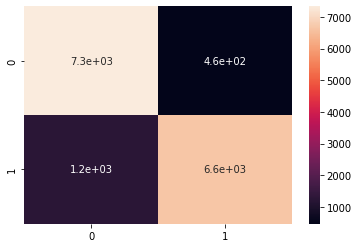

In [ ]:
sns.heatmap(test_confusion_matrix, annot=True)